# Matriz de Confusión

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "classificacion_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")
penguins.drop(columns=["Dream", "Biscoe", "Torgersen"], inplace=True)

In [4]:
X = penguins.drop(["target"], axis=1)
y = penguins["target"]

In [5]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

In [6]:
# Entrenar modelo
tree_cls = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
tree_cls.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_cls,
    out_file=str(IMAGES_PATH / "classificacion_tree_conf.dot"),
    feature_names=X_train.columns,
    class_names = [ "Adelie","Chainstrao", "Gentoo"],
    rounded=True,
    filled=True
)

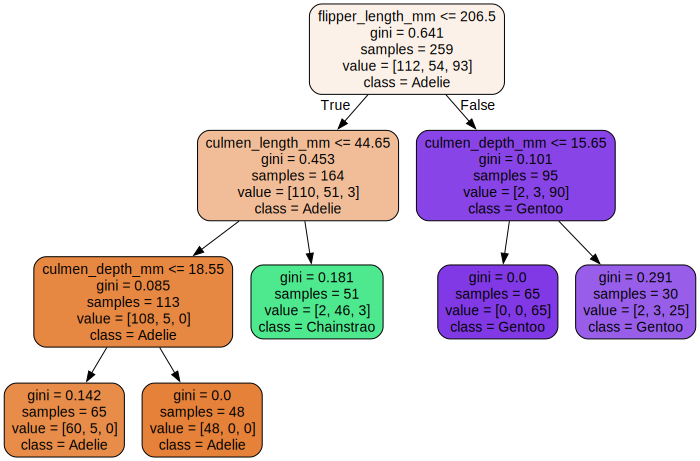

In [11]:
from graphviz import Source
Source.from_file(IMAGES_PATH / "classificacion_tree_conf.dot")

In [8]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, \
                            precision_score, recall_score



In [13]:
labels = [ "Adelie","Chainstrao", "Gentoo"]
multilabel_confusion_matrix(y_train, tree_cls.predict(X_train))
# Calcular accuracy precisión, recall

array([[[142,   5],
        [  4, 108]],

       [[200,   5],
        [  8,  46]],

       [[161,   5],
        [  3,  90]]], dtype=int64)

In [16]:
precision = 108 / (108 + 5)
precision

0.9557522123893806

In [20]:
recall = 108 / (108 + 4)
recall

0.9642857142857143

In [14]:
classification_report(y_train, tree_cls.predict(X_train), target_names=labels, output_dict=True)

{'Adelie': {'precision': 0.9557522123893806,
  'recall': 0.9642857142857143,
  'f1-score': 0.96,
  'support': 112.0},
 'Chainstrao': {'precision': 0.9019607843137255,
  'recall': 0.8518518518518519,
  'f1-score': 0.8761904761904762,
  'support': 54.0},
 'Gentoo': {'precision': 0.9473684210526315,
  'recall': 0.967741935483871,
  'f1-score': 0.9574468085106383,
  'support': 93.0},
 'accuracy': 0.9420849420849421,
 'macro avg': {'precision': 0.9350271392519125,
  'recall': 0.9279598338738123,
  'f1-score': 0.9312124282337049,
  'support': 259.0},
 'weighted avg': {'precision': 0.9415266150519171,
  'recall': 0.9420849420849421,
  'f1-score': 0.9416094166246143,
  'support': 259.0}}